In [1]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.ensemble import BaggingClassifier

In [3]:
# Load the dataset
data = pd.read_csv('Loan_default.csv' , sep=",")

# Display the first few rows of the dataset to understand its structure
print(data.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

In [4]:
# List of categorical columns with their respective categories
categorical_mappings = {
    'Education': {"Bachelor's": 0, "Master's": 1, 'High School': 2, 'PhD': 3},
    'EmploymentType': {'Full-time': 0, 'Unemployed': 1, 'Self-employed': 2, 'Part-time': 3},
    'MaritalStatus': {'Divorced': 0, 'Married': 1, 'Single': 2},
    'HasMortgage': {'Yes': 0, 'No': 1},
    'HasDependents': {'Yes': 0, 'No': 1},
    'LoanPurpose': {'Auto': 0, 'Business': 1, 'Other': 2, 'Home': 3, 'Education': 4},
    'HasCoSigner': {'Yes': 0, 'No': 1}
}

# Apply the mapping to the data
for column, mapping in categorical_mappings.items():
    data[column] = data[column].replace(mapping)

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Show the transformed dataset
print("\nTransformed dataset:")
print(data.head())


Missing values in each column:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

Transformed dataset:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               4         15.23        36      0.44          0   
1             

In [5]:
# Assuming 'data' is your DataFrame and you want to drop 'LoanID' and use 'Default' as the target variable
X = data.drop(['LoanID', 'Default'], axis=1)
y = data['Default']

X.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,0,0,2,0
1,69,50432,124440,458,15,1,4.81,60,0.68,1,0,1,1,1,2,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1,1,0,0,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,2,0,1,1,1,1,1
4,60,20437,9139,633,8,4,6.51,48,0.73,0,1,0,1,0,0,1


In [6]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
X_train_smote, y_train_smote = oversample.fit_resample(X, y) 

In [7]:
# Splitting between train data into training and validation dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.20)

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Initialize the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

In [9]:
# Initialize the base estimator
from sklearn.metrics import accuracy_score
base_estimator = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier
bagging_clf = BaggingClassifier(
    base_estimator=base_estimator,
    n_estimators=100,      # Number of trees to train
    max_samples=0.8,       # The proportion of the dataset to include in each random sample.
    max_features=0.8,      # The proportion of features to draw from the total features when training each base estimator.
    bootstrap=True,        # Samples are drawn with replacement if True (setting for bagging).
    random_state=42
)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Bagging Classifier: {accuracy:.2f}")

C:\Users\opscu\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy of the Bagging Classifier: 0.90


In [10]:
from sklearn.metrics import classification_report

# Assuming your model is named 'model' and is already trained
# and you have a test set ready as 'X_test' and 'y_test'

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print classification report
print(report)


              precision    recall  f1-score   support

           0       0.86      0.95      0.90     45219
           1       0.95      0.84      0.89     45059

    accuracy                           0.90     90278
   macro avg       0.90      0.90      0.90     90278
weighted avg       0.90      0.90      0.90     90278



In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

results = cross_validate(bagging_clf, X_train_smote, y_train_smote, cv=5, scoring=scoring)

for metric_name in scoring:
    metric_result = results['test_' + metric_name]
    print(f"{metric_name}: {metric_result.mean():.2f} +/- {metric_result.std():.2f}")

C:\Users\opscu\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\opscu\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\opscu\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\opscu\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\opscu\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


accuracy: 0.89 +/- 0.10
precision_macro: 0.91 +/- 0.07
recall_macro: 0.89 +/- 0.10
f1_macro: 0.89 +/- 0.11


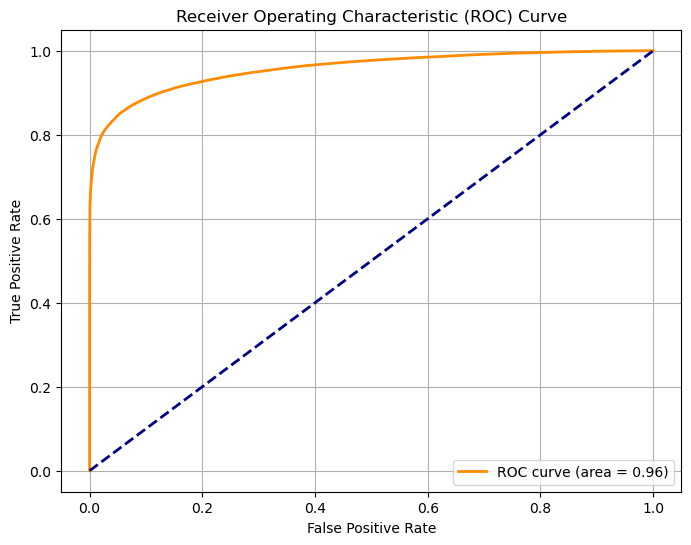

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, roc_auc_score
from sklearn.ensemble import BaggingClassifier

# Assuming you have a trained model, and X_test, y_test ready
# We continue from the previous classifier model you have created

# Predict probabilities for the test data for ROC curve
y_probs = bagging_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the model
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

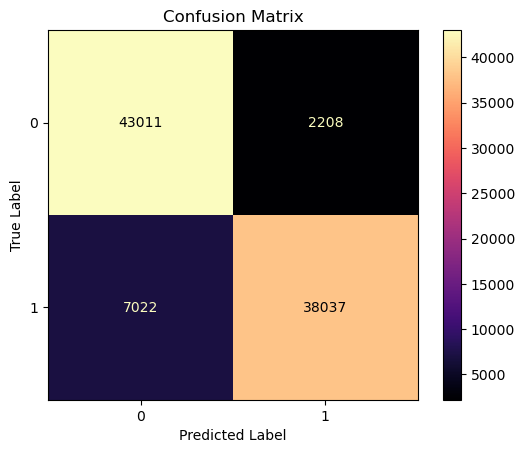

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from termcolor import colored as cl  # Text customization
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with a custom color map
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging_clf.classes_)
disp.plot(cmap='magma')  # Using 'viridis' color map for better visual appeal
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()